# Course: Intro to Python & R for Data Analysis
## Lecture: Becoming a Viz Kid

Professor: Mary Kaltenberg

Fall

contact: mkaltenberg@pace.edu

About me: www.mkaltenberg.com

## We got data, now how do we visualize it?

There are many graphing packages out there, but the most popular one is matplotlib.

I also find seaborn more intuitive, and frankly, prettier.  

So, we'll go over both in this lecture. 


<img src="https://media.giphy.com/media/xT5LMDYj4kvKNlGDHq/giphy.gif" width = 300>

### Matplotlib

In [1]:
import matplotlib.pyplot as plt #here is the matplotlib package that we will use
import pandas as pd

In [2]:
path = '/Users/mkaltenberg/Documents/GitHub/Data_Analysis_Python_R/Becoming a Viz Kid/'

# First, we import our data into a dataframe
# we'll be using data about walmart store openings
walmart = pd.read_csv(path+'1962_2006_walmart_store_openings.csv')

### Line Graphs

In [12]:
# let's start with a line graph of the number of stores open over time (in total)
#first we must calculate this information
store_time = walmart[['YEAR','storenum']].drop_duplicates().groupby('YEAR').count().reset_index().rename({'storenum':'N stores'}, axis = 1)


line graphs use the function called plot from matplotlib. It's the easiest of all of the graphing capabilities in python

``` python
plt.plot(x,y)
```
you enter your x axis information first then your y axis information 


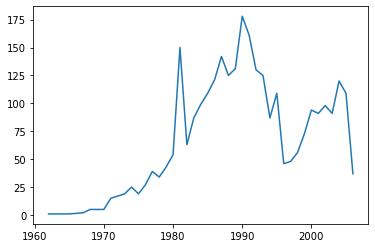

In [14]:
plt.plot(store_time['YEAR'],store_time['N stores'])

# you're first graph in python - that was easy!

Let's add some information to this graph because you should **ALWAYS ALWAYS ALWAYS** include (read that as points off if I don't see this in your project):
- x-axis title
- y-axis title
- graph title
- legend (where applicable)

90% of the work in graphing in python is getting these items the way you want them to look. 


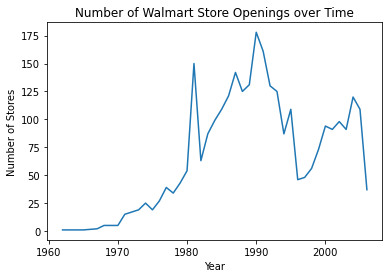

In [16]:
plt.plot(store_time['YEAR'],store_time['N stores']) #The plot
plt.xlabel('Year') # adding the x label
plt.ylabel('Number of Stores') #adding the y label
plt.title("Number of Walmart Store Openings over Time") #adding the title
plt.show()  # This function is to display your graph (it's easier to always include it as the last line in your code) 

### Let's spice it up

What if you want to get the number of walmart store openings over time by state? Sometimes this is called a spaghetti graph


In [17]:
# First, I have to create the information that I want to display. 
# I can calculated the numner of walmart store opening by time and by state with groupby and count the values that exist
# I can count the number of stores that there is in each year and state assuming that each observation is a store 
store_time_state = walmart[['YEAR','STRSTATE','storenum']].drop_duplicates().groupby(['YEAR', 'STRSTATE']).count().reset_index()
store_time_state

,YEAR,STRSTATE,storenum
0,1962,AR,1
1,1964,AR,1
2,1965,AR,1
3,1967,AR,2
4,1968,AR,1
...,...,...,...
721,2006,TN,1
722,2006,TX,3
723,2006,VA,1
724,2006,WA,3


In [20]:
store_time_state['STRSTATE'].unique()

array(['AR', 'MO', 'OK', 'KS', 'LA', 'TN', 'KY', 'MS', 'TX', 'IL', 'AL',
       'GA', 'SC', 'FL', 'NE', 'IA', 'IN', 'NC', 'NM', 'VA', 'CO', 'WI',
       'MN', 'AZ', 'OH', 'MI', 'WV', 'WY', 'CA', 'ND', 'NV', 'PA', 'SD',
       'UT', 'DE', 'MD', 'NY', 'ID', 'MT', 'OR', 'WA'], dtype=object)

Text(0, 0.5, 'Number of Stores')

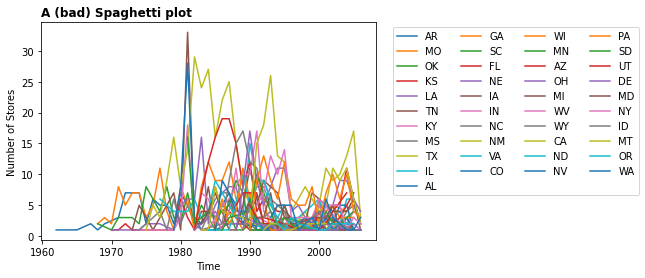

In [21]:
#create a list of states
states = store_time_state['STRSTATE'].unique()


#What this does is plot the line for each state then adds 
#it to the plotting area.
for s in states:
    state_store = store_time_state[(store_time_state['STRSTATE']==str(s))] 
    #filter the dataframe by state (s)
    plt.plot(state_store['YEAR'],state_store['storenum'], label=s) 
    #plot the year and number of stores
    # and label it with the state acronym

# Add legend
plt.legend( loc='upper right', bbox_to_anchor=(1.8, 1), ncol=4)
# # very specific information about where I want the legend to be (more on this next time)

# # Add titles
plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight='bold') 
# #more detailed options (font size and font weight! yay!
plt.xlabel("Time") #Xlabel
plt.ylabel("Number of Stores") #ylabel

[Check out the documentation from matplotlib about legends](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

Text(0, 0.5, 'Number of Stores')

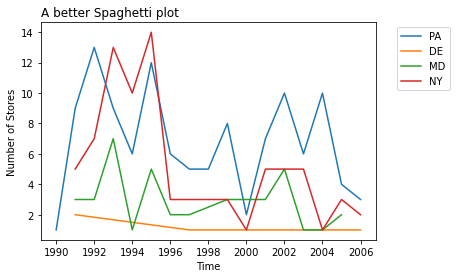

In [22]:
#Let's make a better graph
select_walmart = walmart[(walmart['STRSTATE'] == 'NY') | (walmart['STRSTATE'] == 'PA')|
                     (walmart['STRSTATE'] == 'MD') |(walmart['STRSTATE'] == 'DE')] 
# filter the data for a set of states

store_time_state = select_walmart[['YEAR','storenum', 'STRSTATE']].drop_duplicates().groupby(['YEAR', 'STRSTATE']).count().reset_index()
#calculating the number of stores there are by year and state
states = store_time_state['STRSTATE'].unique()
#creating a list of the unique states in my dataframe

for s in states:
    state_store = store_time_state[(store_time_state['STRSTATE']==str(s))] #filtering by state
    plt.plot(state_store['YEAR'],state_store['storenum'], label=s) #creating a line plot to be added

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# very specific information about where I want the legend to be (more on this next time)

# Add titles
plt.title("A better Spaghetti plot", loc='left', fontsize=12, fontweight=0) #more detailed options! yay!
plt.xlabel("Time")
plt.ylabel("Number of Stores")

## Bar Graphs

In [24]:
# let's find out the total number of super centers compared to wal-mart stores in NY
ny_walmart = walmart[(walmart['STRSTATE'] == 'NY')]

Text(0, 0.5, 'Number of Stores')

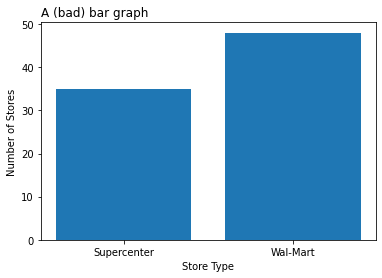

In [26]:
ny_walmart = ny_walmart[['type_store','storenum']].drop_duplicates().groupby('type_store').count().reset_index()

plt.bar(ny_walmart['type_store'], ny_walmart['storenum'])

plt.title("A (bad) bar graph", loc='left', fontsize=12, fontweight=0) #more detailed options! yay!
plt.xlabel("Store Type")
plt.ylabel("Number of Stores")

In [27]:
select_walmart = walmart[(walmart['STRSTATE'] == 'NY') | (walmart['STRSTATE'] == 'PA')|
                     (walmart['STRSTATE'] == 'MD') |(walmart['STRSTATE'] == 'DE')]
select_walmart = select_walmart[['type_store','storenum', 'STRSTATE']].drop_duplicates().groupby(['type_store', 'STRSTATE']).count().reset_index()


In [28]:
select_walmart

,type_store,STRSTATE,storenum
0,Supercenter,DE,4
1,Supercenter,MD,8
2,Supercenter,NY,35
3,Supercenter,PA,70
4,Wal-Mart,DE,4
5,Wal-Mart,MD,33
6,Wal-Mart,NY,48
7,Wal-Mart,PA,46


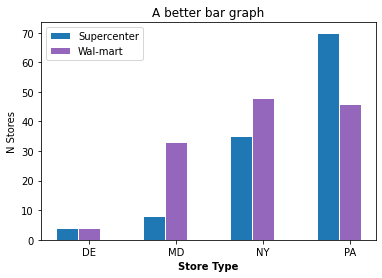

In [29]:
import numpy as np

s_bar = select_walmart['storenum'][select_walmart['type_store']=='Supercenter']
w_bar = select_walmart['storenum'][select_walmart['type_store']=='Wal-Mart']

barWidth = 0.25

r1 = np.arange(len(s_bar))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, s_bar, color='tab:blue', width=barWidth, edgecolor='white', label='Supercenter')
plt.bar(r2, w_bar, color='tab:purple', width=barWidth, edgecolor='white', label='Wal-mart')
 
# # Add xticks on the middle of the group bars
plt.xlabel('Store Type', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(s_bar))], ['DE', 'MD', 'NY', 'PA'])
plt.ylabel('N Stores')
plt.title("A better bar graph")
 
# #  Create legend & Show graphic
plt.legend()
plt.show()

A great source of colors is in the documentation for matplotlib
- [Here are some pallettes that you can use, too](https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html)
- [Here are named colors you can use](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)
- [pick a color, any color (hex codes)](https://htmlcolorcodes.com/)

### Scatter plots

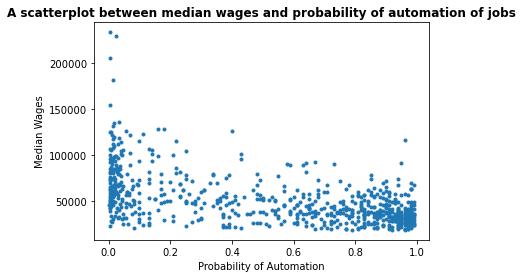

In [33]:
#import the data
jobs = pd.read_csv('job-automation-probability.csv')

#plot
#notice that this is the same command as the line graph, but I replace linestyle with none and create a marker type
plt.plot('prob','median_ann_wage', data=jobs, linestyle='none', marker='.')

# Add xticks on the middle of the group bars
plt.ylabel('Median Wages', )
plt.xlabel('Probability of Automation')
plt.title("A scatterplot between median wages and probability of automation of jobs",fontweight='bold')
 
# # Create legend & Show graphic

plt.show()


[so many marker styles!](https://matplotlib.org/stable/api/markers_api.html)

In [34]:
jobs['education'].unique()

array(['High school diploma or equivalent', "Bachelor's degree",
       'Postsecondary nondegree award', "Associate's degree",
       'No formal educational credential',
       'Doctoral or professional degree', "Master's degree",
       'Some college, no degree'], dtype=object)

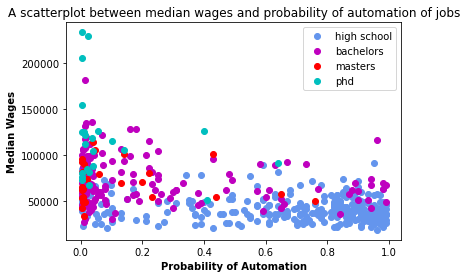

In [35]:
# Adding layers highlighting categorical data
hs = jobs[jobs['education']=='High school diploma or equivalent']
ba = jobs[jobs['education']=='Bachelor\'s degree']
ms = jobs[jobs['education']=='Master\'s degree']
phd = jobs[jobs['education']=='Doctoral or professional degree']

#plot
plt.plot('prob', 'median_ann_wage',data=hs,linestyle='none', marker='o', color = 'cornflowerblue', label='high school')
plt.plot('prob', 'median_ann_wage',data=ba,linestyle='none', marker='o', color = 'm', label='bachelors')
plt.plot('prob', 'median_ann_wage',data=ms,linestyle='none', marker='o', color ='r', label='masters')
plt.plot('prob','median_ann_wage', data=phd,linestyle='none', marker='o', color ='c', label='phd')


plt.ylabel('Median Wages', fontweight='bold')
plt.xlabel('Probability of Automation', fontweight='bold')
plt.title("A scatterplot between median wages and probability of automation of jobs")
 
# Show graphic

plt.legend()
plt.show()


## Histogram

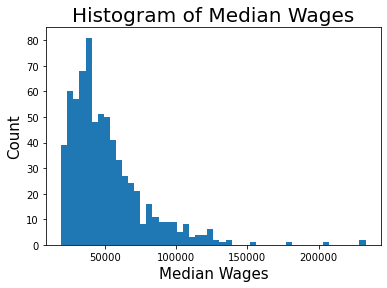

In [40]:
plt.hist(jobs['median_ann_wage'], bins=50)

plt.xlabel('Median Wages', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title("Histogram of Median Wages", fontsize=20)


plt.show()



### Box plots

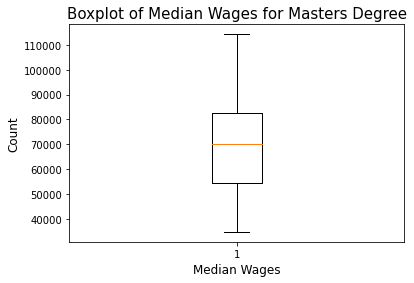

In [41]:

plt.boxplot(ms['median_ann_wage'])

plt.xlabel('Median Wages', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Boxplot of Median Wages for Masters Degree", fontsize=15)


plt.show()

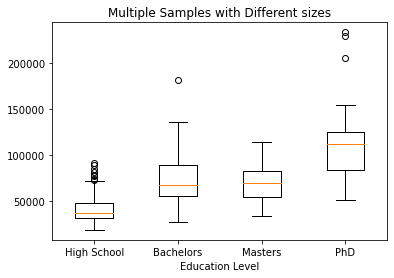

In [42]:
# We can show boxplots of median wages by education type

#create a list
data = [hs['median_ann_wage'],ba['median_ann_wage'],ms['median_ann_wage'],phd['median_ann_wage']]

fig, ax = plt.subplots()  #So, here is the new thing
#(you will use this often)
# You're going to create a figure area and an axis
# This allows you to layer subplot areas ontop of one another

# you can then change specific things about the axis, 
#but you must "set" them for the entire figure
ax.set_title('Multiple Samples with Different sizes')
ax.set_xlabel('Education Level')
ax.boxplot(data,labels=['High School','Bachelors','Masters','PhD'])

plt.show()

### Pie Chart

In [44]:
# Let's calculate  the percent of employed people by education level in our dataset
education_pie = jobs[['numbEmployed','education']].drop_duplicates().groupby('education').sum().reset_index()
tot = education_pie['numbEmployed'].sum()
education_pie['% total'] = education_pie['numbEmployed']/tot
education_pie

,education,numbEmployed,% total
0,Associate's degree,2993610,0.022840
1,Bachelor's degree,25919930,0.197758
2,Doctoral or professional degree,2414210,0.018419
3,High school diploma or equivalent,49368650,0.376661
4,Master's degree,1926250,0.014696
5,No formal educational credential,38641800,0.294820
6,Postsecondary nondegree award,6823230,0.052058
7,"Some college, no degree",2981570,0.022748


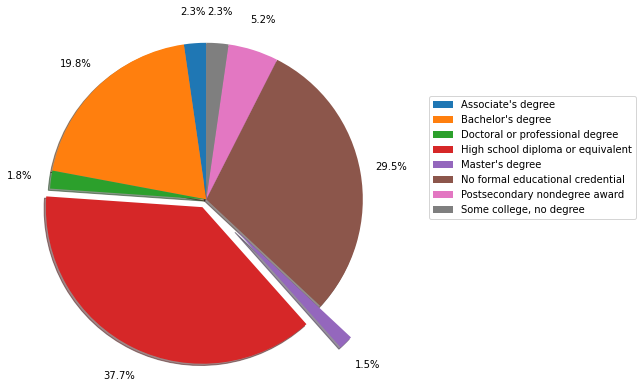

In [47]:
# Make figure and axes
fig, ax1 = plt.subplots()

explode = (0, 0, 0, 0.1, 0.5,0,0,0)

# A standard pie plot
ax1.pie(education_pie['% total'], labels=education_pie['education'], autopct='%1.1f%%', 
        explode=explode, shadow=True, startangle=90, labeldistance=None, pctdistance=1.2, 
        radius = 1.8)

ax1.legend(loc='upper left',bbox_to_anchor=(1.5, 1))

plt.show()



# Breakout Exercise

Use the jobs automation dataset and create:
1. A Histogram of the variable 'probability'
2. A scatter plot of 'Average annual wage' and 'numbEmployed'
3. A pie chart of employment by 'education' group for occupations that begin with the first 2 digits '11' from the variable '_ - code'(this is trickier)

Be sure to include a title, y-axis title, x-axis title, and legend (where appropriate).


In [ ]:
#import the data:
jobs = pd.read_csv('job-automation-probability.csv')
jobs.columns

## Useful Resources:

[Gallery of a various graphing techniques](https://python-graph-gallery.com/)

### Next time - Seaborn and dealing with axes, legends, and other annoying options.